# Homework 3

## Problem statement overall

A signal $s_0(x)$ is given by

$$
s_0(x)=
\begin{cases}
\sin(2\pi x),&x\in[-3,3],\\
0,&elsewhere.
\end{cases}
$$

A perturbation $p(x)$ is given by

$$
p(x)=
\begin{cases}
\sin(20\pi x),&x\in[-3,3],\\
0,&elsewhere.
\end{cases}
$$

The perturbed signal $s(x)$ is given by $s(x)=s_0(x)+p(x)$.

## Numerical Integration

This problem involves numerical integration, so first of all, let's review one of numerical integration methods.

### Simpson's rule formula

Cut interval $[a,b]$ into n piece, so step $h=\frac{b-a}n$, point $x_k=a+kh$.

Then $S_n$ is given by:

$$
S_n=\sum_{k=0}^{n-1}\frac h6\left[f(x_k)+4f(x_{k+\frac12})+f(x_{k+1})\right]
$$

### Code for Numerical Integration

Write the code for Simpson's rule formula as following:

In [1]:
function Simpson(f::Function,interval::Tuple{<:Real,<:Real};n::Integer=100)
    a,b = interval
    h = (b-a)/n
    fx(k) = f(a+k*h)
    Sₙ = h/6*sum((fx(k)+4*fx(k+.5)+fx(k+1)) for k in 0:n-1)
    return Sₙ
end;

## Problem A

### Question statement

Calculate the cross correlation $\int_{-\infty}^{\infty}s_0(y)s_0(y+x)dy$ of $s_0$ with itself.

#### Theoretical analysis

Denote $I(x):=\int_{-\infty}^{\infty}s_0(y)s_0(y+x)dy$.

It's easy to see that $I(x)=0$ when $x\not \in(-6,6)$, so we consider $I(x)$ in $x\in(-6,6)$.

First, we consider $x\in(0,6)$, we have:

$y\in (-3,3-x)\Leftrightarrow s_0(y)s_0(y+x)\neq 0$ a.e. (almost everywhere)

Then $I(x)=\int_{-3}^{3-x}s_0(y)s_0(y+x)dy$

$$
\begin{align}
I(x)&=\int_{-3}^{3-x}s_0(y)s_0(y+x)dy\\
&=\int_{-3}^{3-x}\sin(2\pi y)\sin(2\pi(x+y))dy\\
\end{align}
$$

Using formula $\sin a\sin b=\frac{\cos(a-b)-\cos(a+b)}2$,

$$
\begin{align}
I(x)&=\frac12\int_{-3}^{3-x}\cos(2\pi x)-\cos(2\pi(x+2y))dy\\
&=\frac12(6-x)\cos(2\pi x)-\frac12\int_{-3}^{3-x}\cos(2\pi x)\cos(4\pi y)-\sin(2\pi x)\sin(4\pi y)dy\\
&=3\cos(2\pi x)-\frac{x}2\cos(2\pi x)-\frac{\cos(2\pi x)}2\int_{-3}^{3-x}\cos(4\pi y)+\frac{\sin(2\pi x)}2\int_{-3}^{3-x}\sin(4\pi y)dy\\
&=3\cos(2\pi x)-\frac{x}2\cos(2\pi x)-\frac{\cos(2\pi x)}2\frac{\sin(4\pi y)}{4\pi}\bigg|_{y=-3}^{y=3-x}-\frac{\sin(2\pi x)}2\frac{\cos(4\pi y)}{4\pi}\bigg|_{y=-3}^{y=3-x}\\
\end{align}
$$

Omit complex and tedious simplification progress, since it takes lone time to type and wastes life.

Finally,

$$
I(x)=\frac{\sin (2 \pi  x)-2 \pi  x \cos (2 \pi  x)+12 \pi  \cos (2 \pi  x)}{4 \pi }
$$.

When $x\in(-6,0)$, the progress is quite similar, so omit the derivation.

In conclusion,

$$
I(x)=
\begin{cases}
\frac{-\sin (2 \pi  x)+2 \pi  x \cos (2 \pi  x)+12 \pi  \cos (2 \pi  x)}{4 \pi }, & -6<x\leq 0, \\
\frac{\sin (2 \pi  x)-2 \pi  x \cos (2 \pi  x)+12 \pi  \cos (2 \pi  x)}{4 \pi }, & 0<x<6, \\
0,& elsewhere.
\end{cases}
$$

#### Numerical solution

First of all, define those function in env.

In [2]:
s₀(x) = -3<=x<=3 ? sin(2π*x) : 0

p(x) = -3<=x<=3 ? sin(20π*x) : 0

s(x) = s₀(x) + p(x);

Then we write a function `correlation` to calculate cross correlation of two signal using Simpson's rule formula.

In [3]:
function correlation(s₁::Function,s₂::Function,interval::Tuple{<:Real,<:Real};n=100)
    f(x,y) = s₁(y)*s₂(x+y)
    return x->Simpson(y->f(x,y),interval;n=n)
end;

The numerical solution of cross correlation $\int_{-\infty}^{\infty}s_0(y)s_0(y+x)dy$ of $s_0$ with itself is given as $f(x)$

In [4]:
f(x) = correlation(s₀,s₀,(-10,10);n=100)(x);

Let's plot the function $f(x)$.

First of all, import all dependent packages.

In [5]:
# mute logging in jupyter notebook
import Logging
Logging.disable_logging(Logging.Warn)

# load dependency
using Distributions, Plots, Printf

plotly();

Then plot numerical solution function of the cross correlation.

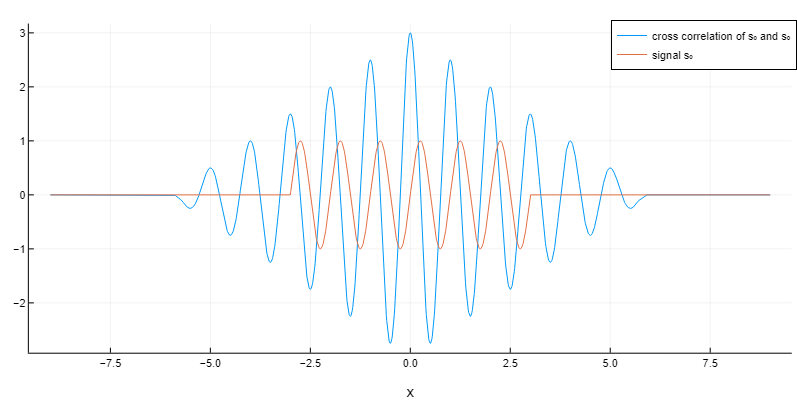

In [6]:
xs = -9:0.01:9
plotly()
plot(f,xs,label="cross correlation of s₀ and s₀")
plot!(s₀,xs,label="signal s₀")
xlabel!("x")

## Problem B

### Question statement

Calculate the convolution $(s*r)(x)=\int_{-\infty}^{\infty}s(y)r(x-y)dy$ for  the  perturbed  signal s and  a 
response  function r given  by $r(x)=\frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{x^2}{2\sigma^2}}$ with $\sigma=0.2$. See the effect of $\sigma$ on $(s*r)(x)$ with other value.

First of all, define the response function in env.

In [7]:
r(x;σ=0.2)=pdf(Normal(0,σ),x);

> since the response function is the pdf of normal distribution, I just import it from `Distributions` package instead of rewrite it by myself.

Then I write a function `convolution` to calculate convolution of signal and response function using Simpson's rule formula.

In [8]:
function convolution(s::Function,r::Function,interval::Tuple{<:Real,<:Real};n=100)
    f(x,y) = s(y)*r(x-y)
    return x->Simpson(y->f(x,y),interval;n=n)
end;

The numerical solution of convolution $(s*r)(x)=\int_{-\infty}^{\infty}s(y)r(x-y)dy$ is given by $s_1(x)$.

In [9]:
s₁(x) = convolution(s,r,(-6,6);n=1000)(x);

Plot the new signal $s_1(x)$ smoothed by convolution and compare it with origin signal $s(x)$.

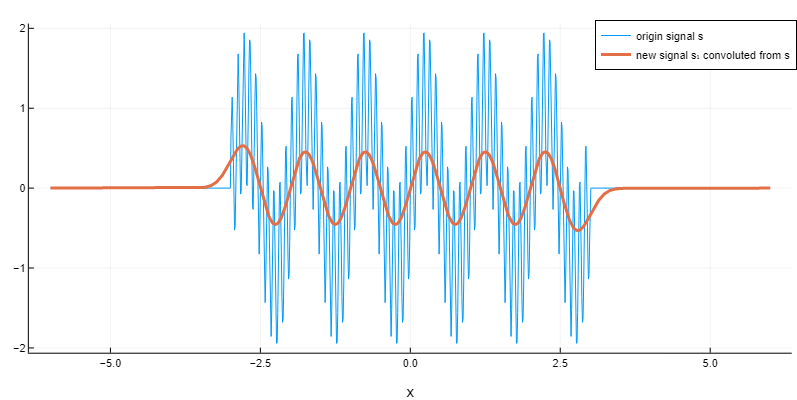

In [10]:
xs = -6:0.01:6
plotly()
plot(s,xs,label="origin signal s")
plot!(s₁,xs,label="new signal s₁ convoluted from s",lw=3)
xlabel!("x")

From this plot, we can see the new signal $s_1$ is smoother that origin signal as expected.

Now, let's see the effect of $\sigma$ on $(s*r)(x)$ with other value.

Change the value of $\sigma$ from small to big and do the convolution to generate new signal. I plot them in 3D.

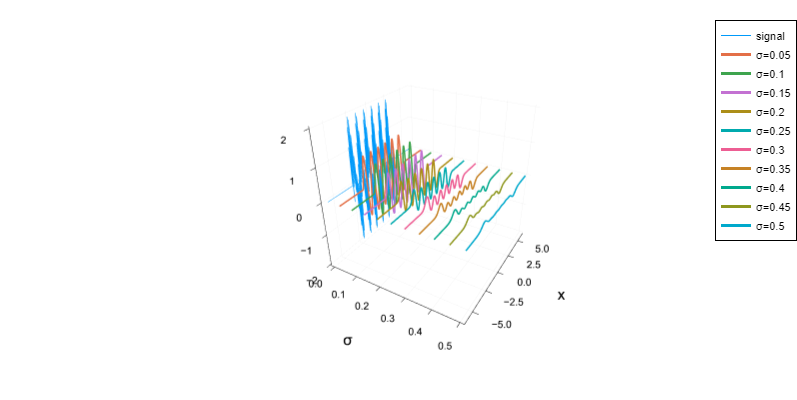

In [11]:
plotly()
xs = -6:0.01:6
len = length(xs)
plot(zeros(len),xs,s.(xs),label="signal")

for σ in 0.05:0.05:0.5
    s₁(x) = convolution(s,x->r(x;σ=σ),(-6,6);n=1000)(x)
    σs = σ.*ones(len)
    plot!(σs,xs,s₁.(xs),label="σ=$σ",lw=3)
end

ylabel!("x")
xlabel!("σ")

We can see that the new signal become smoother and smoother with $\sigma$ increasing, which means the gauss response function with bigger $\sigma$ have stronger ability to smooth signal and suppress high frequency components.

Plots.AnimatedGif("C:\\Users\\CreatorFan\\Documents\\Course\\PostGraduate\\Coursework\\MSDM5003\\Assignment\\HW3\\tmp.gif")
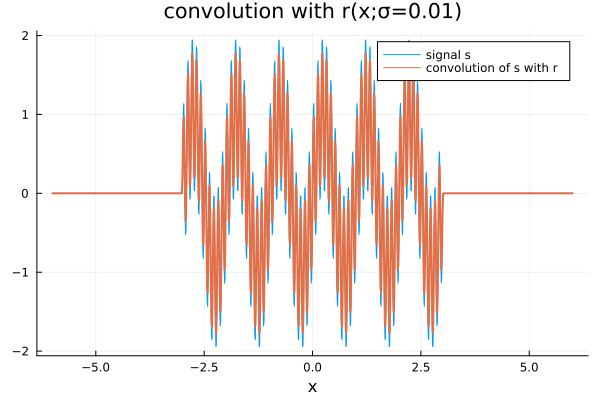

In [12]:
gr();
xs = -6:0.01:6
@gif for σ in 0.01:0.01:0.5
    s₁(x) = convolution(s,x->r(x;σ=σ),(-6,6);n=1000)(x)
    plot(s,xs,label="signal s")
    plot!(s₁,xs,label="convolution of s with r",lw=2)
    xlabel!("x")
    title!("convolution with r(x;σ=$(@sprintf("%1.2f",σ)))")
end

Meanwhile, I also create a animation to show the new signal become smoother with $\sigma$ increasing.